<a href="https://colab.research.google.com/github/RobertMa05/ADA-Assignment-2/blob/master/Assignment_2_PracticalProject_13261185_%26_12643375_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 2: Practical Data Analytics Project

31005 Advanced Data Analytics

Spring 2019

# Student Name: Xiaoju Ma & Chaoran Pei

# Student Id: 13261185 & 12643375

#### Link to the Github Notebook file: 
#### Link to the Video: 

---

##Introduction

ID3 algorithm is taking the rate of decline of information entropy as the criterion for selecting test attributes. It is selecting the attribute with the highest information gain that has not been used for the division at each node as the division criterion, and then continuing the process until the generated decision tree can be perfectly classified samples.

The decision tree is a common machine learning algorithm, it is a decision model based on the tree structure of data attributes, which can be used to solve classification and regression problems. In general, it is the process of making decisions by using choice, which belongs to a kind of prediction model. Usually, we use the logical order of if, else, then.

In other words, a decision tree logically exists as a tree, containing root nodes, internal nodes, and leaf nodes. Root node provides a collection that contains all the data in the dataset. And internal node states that each internal node is a judgment condition and contains a collection of data in the dataset that satisfies all conditions from the root node to the node. According to the test result of the judgment condition of an internal node, the data set corresponding to an internal node is divided into two or more child nodes. Also, the leaf node shows the final category, and the data contained in the leaf node belongs to that category.

In short, the decision tree is a multi-classification model that uses a tree model to make decisions, which is simple, effective and easy to understand.

1970's Quinlan finds a decision selection process that used entropy in information theory to measure decision trees. Its simplicity and efficiency caused a stir, and Quinlan calls the algorithm ID3(Iterative Dichotomiser 3).
ID3 algorithm is taking the rate of decline of information entropy as the criterion for selecting test attrubutes. It is selecting the attribute with the highest information gain that has not been used for the division at each node as the division criterion, and then continuing the process until the generated decision tree can be perfectly classified samples.

In this report, we impelment the ID3 algorithm and we use a dataset to test it.

###Input:
It is a dataset shows 11 attributes which are ingredients in wines. The dataset should have category values hence it need to be split by mean value of each attribute. It can show the results for each attribute such as high or low and good or bad. 

###Output:
The output presents a decision tree with about 2 depths using pprint, and a visualization diagram using graphviz. The output is randomly chosen in the test data (testdf) which in the rows from 980 to 1010 in the entire dataset.

####Output using pprint:
{'total sulfur dioxide <= 12.9': ['Good', 'Bad']}

####Output using graphviz:
![Decision Tree output using graphviz](https://github.com/RobertMa05/ADA-Assignment-2/blob/master/Output2.png?raw=true)


##Exploration

###Identify Challenges
1. Structure of codes: 

* Identify and split attributes more clearly
* The structure of the tree
* Make depths in detailed by Decision Tree Algorithm

2. Calculations:

* Calculate and create entropy
* Calculate information gain

###Data Structures

* Input dataset that searched from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009, which has 11 attributes to achieve ID3 Algorithm: 

  columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

* Split each attribute and identify the result is high or low and good or bad
* Helper functions for entropy and complete depths of Decision Tree Algorithm.


### Data Models and Tests

1. Runing codes through Colab




2. Showing Methodology that input a dataset which has 11 attributes for wines and count, mean, std, etc of each attribute.

3. Before we planned to prepare data part that split each attribute to find the quality data and compare with mean to show it is good and bad or high and low, but it cannot make an effective threshold. So, we choose a suitable threshold to minimize the classification error rate and determine the threshold instead of using the mean directly. Besides, we split the attributes of the dataset and get the best feature and split value by calculating the best information gain.

4. Provide some helper functions that check the purity and classify the dataset.

5. Then, calculating the entropy from the formula 
  * $Ent(D)=-\sum_{k=1}^{\left|y\right|}p_{k}log_{2}p_{k}$ 
  * where:
      * $H(X)$: entropy of entire dataset X
      * $k$: the set of labels
      * $p_k$: proportion of # of instances in class c to all instances
  and define count of the unique values of the quality column to show how much of good or bad. Also, it has a test on the split the size of quality, since when entropy become more lower, the pure of information will become more higher.

6. Split attribute data that make an input value then compare with it to split bigger and smaller values. Besides, it has a test that makes a column only showing ‘high’ value if it input High and the result shows all value is above 2.

7. The overall entropy is following the formula $p_T \frac{len(data_T)}{|n|} + p_F \frac{len(data_F)}{|n|}$. We calculate it for the information gain.

8. Possible splits are creating a dictionary and it will output the shape of the data frame. Then, we create a loop and get the unique values of each column.

9. After possible splits, we can find the best attribute to split and its value. Features have a difference between the original entropy and the entropy classified which is the information gain divided. 
  the formular of the information gain is :
  * $ InfoGain(F, X) = Ent(S) - \sum_{t\in T}p_tEnt(t) $
  * where:
      * $IG(F. X)$: information gained by splitting D by feature F
      * $Ent(D)$: entropy of entire dataset D
      * $T$: subsets created by splitting on feature F
      * $p_t$: proportion of # of instances in t to all instances
      * $H(t)$: entropy of subset t

  Moreover, a feature can classify a dataset and characteristics can classify conditional empirical entropy. If the entropy value decreases to a maximum after dividing by the feature, the secondary feature is the best classification feature.

10. Last step we will make ID3 Decision Tree Algorithm. Firstly, we will check the array is 2D or 3D. If all instances in the dataset belong to the same class, it is a single-node tree and the class acts as the class label for that node. If the feature set is empty, it is a single-node tree, and the class with the largest number of samples in the dataset is treated as the class label of the node.

11. Using helper functions to build the decision tree and split the tree whether true or false. If the answer is the same, it only has one unique value. Otherwise, it will continue the splitting and loop the build function from classification again, until it reaches the maximum depth that we set.

12. Test data model using the algorithm built and the  Python machine learning library scikit-learn.

13. Check the Accuracy

##Methodology

###Losding csv file as our dataset

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import operator
from sklearn import datasets
from math import log
from pprint import pprint

In [0]:
#load file from Github
df = pd.read_csv('https://raw.githubusercontent.com/RobertMa05/ADA-Assignment-2/master/winequality-red.csv')

In [265]:
#display the dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [269]:
#checking the display
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [270]:
#Checking if the dataset have null value, check the cells in eack column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [271]:
#Now, have a look at the mean, 
#so that we could define the features and the quality as high and low, good and bad
#if it's higher than the mean value, then it's high/good, otherwise, it's defined as low/bad.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###Prepare Data

First we split the label by defining Good and Bad, as mentioned in kaggle https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 where we find the dataset, the quality of a good red wine should be 6.5, so the point we split them is 6.5. We are doing it for the decision tree model.

###Split the Quality

In [272]:
#check the unique number of all quality in the column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [0]:
# Define the quality by 'Good' and 'Bad'.
splitQuality = []

for i in df['quality']:
    if i <= 6.5:
        splitQuality.append('Bad')
    elif i > 6.5:
        splitQuality.append('Good')

df['splitQuality'] = splitQuality
#make a new column for it 

In [274]:
#count each type of quality
from collections import Counter

Counter(df['splitQuality'])

Counter({'Bad': 1382, 'Good': 217})

In [275]:
#Checking how the df changed
traningData = df.values[:5]
traningData

array([[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4,
        5, 'Bad'],
       [7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8,
        5, 'Bad'],
       [7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8,
        5, 'Bad'],
       [11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8,
        6, 'Bad'],
       [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4,
        5, 'Bad']], dtype=object)

In [276]:
# After we defined all the label, 
# we define a new dataframe with the defined data called spliteddf
spliteddf = pd.DataFrame(df, columns=['splitQuality'])
#display in a 2D array
spliteddf.values

array([['Bad'],
       ['Bad'],
       ['Bad'],
       ...,
       ['Bad'],
       ['Bad'],
       ['Bad']], dtype=object)

In [277]:
#let check the information of the new dataframe and have a look at is a null exist.
spliteddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
splitQuality    1599 non-null object
dtypes: object(1)
memory usage: 12.6+ KB


In [278]:
#now we recover our df dataframe with the categorized quality, splitQuality
df = pd.DataFrame(df, columns=['fixed acidity','volatile acidity',
                               'citric acid','residual sugar','chlorides',
                               'free sulfur dioxide','total sulfur dioxide',
                               'density','pH','sulphates','alcohol','splitQuality'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
splitQuality            1599 non-null object
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


###Helper Functions

####Check the Purity of the Dataset

In [0]:
def checkThePurity(spliteddf):
  #define qualityColumn as the label column, 
  #[:, -1] means the last column which is splitedQuality
  qualityColumn = spliteddf[:, -1]
  #define uniqueQuality as the unique values of the qualityColumn
  uniqueQuality = np.unique(qualityColumn)
  # if it's one class,（only good or only bad), the dataset is pure
  if len(uniqueQuality) == 1:
    return True
  else:
    return False


In [280]:
#let have a test on all labels of quality
# it should return False by input the whole dataset
# because it have good and bad qualitiies and it is not pure 
checkThePurity(df.values)

False

####Classify the Dataset

In [0]:
def classifyDS(spliteddf):
  '''
  if the data is pure 
  which means it only have one class(good or bad),
  this function will work to identify the label(quality)
  '''
  #define qualityColumn as the label column, 
  #[:, -1] means the last column which is splitedQuality
  qualityColumn = spliteddf[:, -1]
  #biuld two array, 
  #define uniqueQuality as the unique values of the qualityColumn
  #define CountOfUniqueQuality as count of the unique values of the qualityColumn
  #which means how much of good or bad
  #turn the return_counts to Ture tells us how much of the lable appear
  uniqueQuality, CountOfUniqueQuality = np.unique(qualityColumn, return_counts=True)
  #get the index of the largest unique quality
  qualityindex = CountOfUniqueQuality.argmax()
  #unique them, we need a single answer
  classifiedQuality = uniqueQuality[qualityindex]

  return classifiedQuality

In [282]:
#let have a test on all labels of quality
# it should return 'Good' by input the whole dataset
# because the largest one is Good
classifyDS(df.values)

'Bad'

####Calculate the Entropy



The algorithm is: 
$ Ent(X) = \sum_{c \in C} -p(c) log_2p(c) $* $Ent(D)=-\sum_{k=1}^{\left|y\right|}p_{k}log_{2}p_{k}$ 
  * where:
      * $H(X)$: entropy of entire dataset X
      * $k$: the set of labels
      * $p_k$: proportion of # of instances in class c to all instances

In [0]:
def calcEntropy(spliteddf):
  #the size of quality
  totalNumberOfQualities = len(spliteddf)
  #create a data dictionary
  countsOfQuality = {}
  #define qualityColumn as the label column, 
  #[:, -1] means the last column which is splitedQuality

  qualityColumn = [example[-1] for example in spliteddf]
  #build two array, 
  #define uniqueQuality as the unique values of the qualityColumn
  #define CountOfUniqueQuality as count of the unique values of the qualityColumn
  #which means how much of good or bad
  #turn the return_counts to Ture tells us how much of the lable appear
  #we only ues CountOfUniqueQuality here
  _, CountOfUniqueQuality = np.unique(qualityColumn, return_counts=True)
  #input the CountOfUniqueQuality into the data dictionary
  countsOfQuality = CountOfUniqueQuality
  
  #now we do the same step to define qualityColumn as the label column,
  #in the following steps, tuple indices must be integers or slices, not tuple

 

  probabilities = countsOfQuality / totalNumberOfQualities 
  # Calculate the entropy of each single class
  entropy = sum(probabilities * -np.log2(probabilities)) 
  # Add up the entropy of each class
  
  return entropy

In [284]:
# have a test on the spliteddf
calcEntropy(df.values)

0.5728919822189028

####Split Attributes Data

In [0]:
def splitData(spliteddf, columnToSplit, valueToSplit):
    #for the data we want to split
    splitColumnsValues = spliteddf[:, columnToSplit]

    #the spliteddf dataframe is only categorical 
    # here we ready two type of input for data splitting
    

     #for the value that we split bigger than the input value is data_T
     #  the value that we split smaller than the input value is data_F
    data_T = spliteddf[splitColumnsValues <= valueToSplit]
    data_F = spliteddf[splitColumnsValues > valueToSplit]
    
    ''' 
    else:
    
    
    valueToSplit is the value that we used to split
    if the value in the column = valueToSplit
    then we define as data_T
    otherwise we define as data_F
    
    this means, if we input High,
    data_T only output the dataset with High in this column
    data_F output the rest.
    
    
    data_T = spliteddf[splitColumnsValues == valueToSplit]
    data_F = spliteddf[splitColumnsValues != valueToSplit]
    '''
    return data_T, data_F

In [286]:
#let have a test,
#valueToSplit = 2 and shows all value above 2
#we let the second column only showing 'High' if input High

columnToSplit = 1
valueToSplit = 2
data_T, data_F = splitData(df.values, columnToSplit, valueToSplit)

#show the output,
#wecan see that it shows all value above 2/ the secong column only have 'High' 
#and other columns showing corresponding result

col1valueHigh = pd.DataFrame(data_T, columns=df.columns)

col1valueHigh.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,splitQuality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,Bad
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Bad


####Overall Entropy



The computation algorithms are

$p_T $ = $\frac{len(data_T)}{|n|}$

$p_F $ = $\frac{len(data_F)}{|n|}$

Then

The overall entroy is equal to $p_T \frac{len(data_T)}{|n|} + p_F \frac{len(data_F)}{|n|}$

In [0]:
def calcOverallEntropy(data_T, data_F):
    
    n = len(data_T) + len(data_F)
    p_T = len(data_T) / n
    p_F = len(data_F) / n

    overallEntropy = (p_T * calcEntropy(data_T) 
              + p_F * calcEntropy(data_F))
    
    return overallEntropy

####Possible Splits

In [0]:
def possibleSplits(spliteddf):
  # create a dictionary
    possibleSplitsCol = {}
    # spliteddf.shape will output the shape of this dataframe
    #(1599, 12)
    #we only need the count of the column
    #len(spliteddf[0]) - 1 = number of all columns - 1
    #countOfColumns = len(spliteddf[0]) - 1
    _,countOfColumns = spliteddf.shape
    #creat an loop, range(countOfColumns - 1)mean all column except the lablel column
    #get the unique values of each column
    for columnsNum in range(countOfColumns - 1 ):
            '''
            possibleSplitsCol[columnsNum]= []
            vals= spliteddf[:,columnsNum]
            uniqueVal = np.unique(vals)
            for col in range(len(uniqueVal)):
                
                if columnsNum!=0:
                    currentVal =uniqueVal[col]
                    preVal=uniqueVal[col-1]
                    possibleSplits = float(currentVal+preVal) / 2.0
                    possibleSplitsCol[columnsNum].append(possibleSplits)
        
            '''
            possibleSplitsCol[columnsNum]= []
            val = spliteddf[:, columnsNum]
            uniqueVal = np.unique(val)
            #if there is more than two value, then get the column
            if columnsNum!=0:
                possibleSplitsCol[columnsNum] = uniqueVal
            
    return possibleSplitsCol

In [289]:
countOfColumns = len(df.values[0]) - 1
  #creat an loop, range(countOfColumns - 1)mean all column except the lablel column
  #get the unique values of each column
for columnsNum in range(countOfColumns):
        val = [eg[columnsNum] for eg in df.values]
        uniqueVal = np.unique(val)
uniqueVal

array([ 8.4       ,  8.5       ,  8.7       ,  8.8       ,  9.        ,
        9.05      ,  9.1       ,  9.2       ,  9.23333333,  9.25      ,
        9.3       ,  9.4       ,  9.5       ,  9.55      ,  9.56666667,
        9.6       ,  9.7       ,  9.8       ,  9.9       ,  9.95      ,
       10.        , 10.03333333, 10.1       , 10.2       , 10.3       ,
       10.4       , 10.5       , 10.55      , 10.6       , 10.7       ,
       10.75      , 10.8       , 10.9       , 11.        , 11.06666667,
       11.1       , 11.2       , 11.3       , 11.4       , 11.5       ,
       11.6       , 11.7       , 11.8       , 11.9       , 11.95      ,
       12.        , 12.1       , 12.2       , 12.3       , 12.4       ,
       12.5       , 12.6       , 12.7       , 12.8       , 12.9       ,
       13.        , 13.1       , 13.2       , 13.3       , 13.4       ,
       13.5       , 13.56666667, 13.6       , 14.        , 14.9       ])

In [290]:
possibleSplits(df.values)


{0: [],
 1: array([0.12, 0.16, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
        0.27, 0.28, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.33, 0.34,
        0.35, 0.36, 0.365, 0.37, 0.38, 0.39, 0.395, 0.4, 0.41, 0.415, 0.42,
        0.43, 0.44, 0.45, 0.46, 0.47, 0.475, 0.48, 0.49, 0.5, 0.51, 0.52,
        0.53, 0.54, 0.545, 0.55, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585,
        0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635,
        0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685,
        0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735,
        0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785,
        0.79, 0.795, 0.8, 0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835,
        0.84, 0.845, 0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885,
        0.89, 0.895, 0.9, 0.91, 0.915, 0.92, 0.935, 0.95, 0.955, 0.96,
        0.965, 0.975, 0.98, 1.0, 1.005, 1.01, 1.02, 1.025, 1.035, 1.04,
        1.07, 1.09, 1.115, 1.13, 1.18, 1

####Find the Best Attribute to Split and its split value

In [0]:
def theBestAttributeToSplit(spliteddf, possibleSplitsCol):

    #the number of feature
     #numberOfAttribute = len(spliteddf[0]) - 1
    baseEntropy = calcEntropy(spliteddf)  # Original entropy
    bestInfomationGain = 0.0
    theBestFeature = -1
    thesplitValue = 0.0
    newEntropy = 0.0
    infomationGain = baseEntropy - newEntropy
    '''
    The difference between the original entropy 
    and the entropy classified according to features 
    is the information gain divided according to this feature
    '''
 
    for columnsNum in possibleSplitsCol:
    
            for val in possibleSplitsCol[columnsNum]:
      
                
                # A dataset classified according to a feature
                probabilities = len(data_T) + len(data_F)/ float(len(spliteddf))
                newEntropy += probabilities*calcOverallEntropy(data_T, data_F)  
                # Conditional empirical entropy after classification according to characteristics

    if infomationGain > bestInfomationGain:
         # If the entropy value decreases to the maximum after dividing by a feature, 
         #then the secondary feature is the optimal classification feature
        bestInfomationGain = infomationGain
        theBestFeature = i
        thesplitValue = val
        #Returns the index of the best feature and its split value
    return theBestFeature, thesplitValue 


In [292]:
#let's check this function, get the best feature
possibleSplitsCol = possibleSplits(df.values)
theBestFeature, thesplitValue = theBestAttributeToSplit(df.values, possibleSplitsCol)
theBestFeature, thesplitValue



(6, 14.9)

####ID3 Decision Tree Algorithm

In [0]:
def decisionTree(spliteddf, countDepth=0, minCells=2, maxDepth=5):
    # first check it is a 2D array or a 3D array
    #dataframe.values is a 2 D array,  dataframe is 3D
    if countDepth== 0:
        global COLUMNSINDEX
        COLUMNSINDEX = spliteddf.columns
        data=spliteddf.values
    else:
        data=spliteddf

    '''
      If all instances in the data set belong to the same class, 
      it is a single-node tree and the class is used as a class tag for that node
      If the feature set is an empty set, it is a single-node tree, 
      and the class with the largest number of instances in the dataset 
      is taken as the class tag of the node
    '''
      #checking the purity and classify if necessary
    if (checkThePurity(data)) or (len(data) < minCells) or (countDepth == maxDepth):
        
        classifiedResult = classifyDS(data)
        return classifiedResult
    
    else:
        countDepth += 1
        
        #calling the helper functions
        thepossibleSplits = possibleSplits(data)

        theBestFeature, splitValue = theBestAttributeToSplit(data, thepossibleSplits)

        data_T, data_F = splitData(data, theBestFeature, splitValue)
  
        
        nameOfTheBestFeature = COLUMNSINDEX[theBestFeature]
        if (len(data_T) == 0) or (len(data_F) == 0):
        
            classifiedResult = classifyDS(data)
            return classifiedResult
        #now let's build the tree

        Q = "{} <= {}".format(nameOfTheBestFeature, splitValue)
        subTree = {Q: []}
        #find whether true or false to split the tree
        ture = decisionTree(data_T, countDepth, minCells, maxDepth)
        false = decisionTree(data_F, countDepth, minCells, maxDepth)
        #if the answer is same then only have one unique value,
        #in this case true is the answer
        #otherwise, it will do the splitting and keeping answer
        
        if ture == false:
            subTree = ture
        else:
            subTree[Q].append(ture)
            subTree[Q].append(false)
        #finally, return the tree
        return subTree
    
    

##Evaluation

###Test the Model

In [294]:

# we define a new dataframe with the defined data called testdf
# this dataframe have the row [from 980 to 1010] of df
testdf = df[980:1010]
testdf.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,splitQuality
980,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,Bad
981,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,Bad
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,Bad
983,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,Bad
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,Bad


In [295]:
tree = decisionTree(testdf, maxDepth=50)
pprint(tree)

{'total sulfur dioxide <= 12.9': ['Good', 'Bad']}


This output means the best feature we split first is 'total sulfur dioxide', and we split it with value 12.9 and the dataset will splitted into two part, one part only have good quality, and the other one only have bad quality. 

The output only shows one split, which might not be the currect answer. We set a high enough recursion depth so it should split out more features.

However, we solved a RuntimeError, 'RuntimeError: maximum recursion depth exceeded while calling a Python object'. We didn't check the 'stop futher splitting' conditions in the building of the tree, and it coused my program has been entrying recursive function invocation for too many times. So we added the classifition method to avoid it. When there are less than 2 samples, or the counter reaches the maximum depth, or one side of the splited data have a same label ('Good' or 'Bad'), the classification function will be triggered. 

So this means one of the conditions achieved to stop split in the second splitting. Let's check the splited data with function 'splitData' 

In [296]:
#let have a test,
#the best feature is 'total sulfur dioxide', which is 6 in the index array
#valueToSplit = 12.9 and shows all value only above or below 12.9
#we let the second column only showing 'High' or 'low' if input High

columnToSplit = 6
valueToSplit = 12.9
data_T, data_F = splitData(testdf.values, columnToSplit, valueToSplit)

#show the output,
#wecan see that it shows all value above 2/ the secong column only have 'High' 
#and other columns showing corresponding result

col1valueHigh = pd.DataFrame(data_F, columns=df.columns)

col1valueHigh.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,splitQuality
0,9.1,0.5,0.3,1.9,0.065,8,17,0.99774,3.32,0.71,10.5,Bad
1,9.5,0.86,0.26,1.9,0.079,13,28,0.99712,3.25,0.62,10,Bad
2,7.3,0.52,0.32,2.1,0.07,51,70,0.99418,3.34,0.82,12.9,Bad
3,9.1,0.5,0.3,1.9,0.065,8,17,0.99774,3.32,0.71,10.5,Bad
4,7.1,0.36,0.3,1.6,0.08,35,70,0.99693,3.44,0.5,9.4,Bad


So the condition (len(data_F) == 0) is achieved, snd it stopped splitting.

Here we need to improve the 'stop further splitting' conditions in order to make a better decision tree.

###Further Testing with library 'sklearn'

Now we are going to do one more step to check the output with the Python machine learning library scikt_learn. Using this library with import graphviz, we can get a visualizable output.

In [0]:
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split

In [0]:
'''
first, we set x as the dataframe without the quality column
then y as the contain of the columns quality
'''
x = testdf.drop('splitQuality', axis = 1)
y=testdf['splitQuality']


In [0]:
'''
then we are choosing 90% of the data randomly
and set the random_state as 50
'''
xTraining, xTesting, yTraining, yTesting = train_test_split(x, y, test_size=0.90, random_state=50)

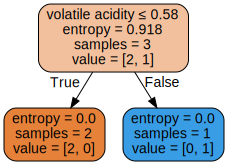

In [300]:
'''
wo make the depth of the spliting as 2
and input the random traing data

'''

classfierDecisionTree=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
classfierDecisionTree=classfierDecisionTree.fit(xTraining,yTraining)


'''
Now
The graphviz module is introduced to export the graph, 
and the resulting graph is shown below
'''
dot_data=tree.export_graphviz(classfierDecisionTree, out_file=None,
                feature_names=list(x.columns.values),
                filled=True,rounded=True,
                special_characters=True)
                              

graphOfTree=graphviz.Source(dot_data)
graphOfTree

In [301]:
'''
We test the prediction accuracy of the decision tree
for the tset data.
'''
accuracyFall = (classfierDecisionTree.predict(xTesting)==yTesting).value_counts()
accuracy = (accuracyFall[1]/(accuracyFall[0]+accuracyFall[1]))*100
print(accuracy,'%')

51.85185185185185 %


###And then, wo are trying to check the decision tree and the accuracy of the whole dataframe.

In [0]:
'''
first, we set x as the dataframe without the quality column
then y as the contain of the columns quality
'''
x = df.drop('splitQuality', axis = 1)
y=df['splitQuality']


In [0]:
'''
then we are choosing 50% of the data randomly
and set the random_state as 50
'''
xTraining, xTesting, yTraining, yTesting = train_test_split(x, y, test_size=0.80, random_state=50)

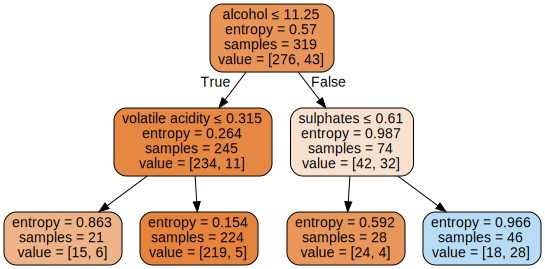

In [304]:
'''
wo make the depth of the spliting as 2
and input the random traing data

'''

classfierDecisionTree=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
classfierDecisionTree=classfierDecisionTree.fit(xTraining,yTraining)

'''
Now
The graphviz module is introduced to export the graph, 
and the resulting graph is shown below
'''
dot_data=tree.export_graphviz(classfierDecisionTree, out_file=None,
                feature_names=list(x.columns.values),
                filled=True,rounded=True,
                special_characters=True)
                              

graphOfTree=graphviz.Source(dot_data)
graphOfTree

In [305]:
'''
We test the prediction accuracy of the decision tree.
for the entire
'''

accuracyFall = (classfierDecisionTree.predict(xTesting)==yTesting).value_counts()
accuracy = (accuracyFall[1]/(accuracyFall[0]+accuracyFall[1]))*100
print(accuracy,'%')

85.46875 %


For the accuracy of the testing data (testdf), we got a accuracy of 87.22222222222223%, and for the entire dataframe (df), we got the accuracy 85.46875%. They both not a pretty high accuracy due to the dataset is not being cleaned, it seem no duplicates and missing values in it but there are outliers inside the entire dataset.

###Comparative with C4.5 Algorithm 

C4.5 algorithm is also one of the top ten algorithms for data mining, which is an improvement of the ID3 algorithm. It has some improvements like select the attribute with the information gain ratio, pruning the tree during the construction of the decision tree, it can deal with non- discrete data and ability to process incomplete data.

C4.5 can develop a decision tree such as missing value and subtraction. There are two ways to handle missing values: One is to drop data with missing values, which is suitable for situations where there are only a few missing values. The other is filling. C4.5 algorithm does not directly fill in missing values but uses probability knowledge to make some changes to the solution of information gain rate. Reduced branching treatment can eliminate overfitting and improve the quality of decision trees. The principle of branch reduction is to remove the subtree with low prediction accuracy, reduce the complexity of the decision tree, and make the decision tree easier to understand. There are two ways to reduce branches: First one is giving a qualification before the decision tree is constructed, limiting the growth of the tree; and another after the decision tree is completely grown, the defective subtree is reduced.
 

##Conclusion

In conclusion, we implement a ID3 decision tree algorithm and find a dataset to analyse by it. The dataset shows 11 ingredients of wines, and the quality of the wine is given. 

First, we prepare the dataset for the model, each attribute is split by the mean value and present as high and low. Next, we build helper functions after split the dataset, for example check the purity and classify the dataset. Moreover, it has formulas of entropy, overall entropy and the information gain. After the helpful functions, a detailed ID3 decision tree alogorithm have been provided. Finally, the desicion tree printed out, we test model and further test with scikit-learn library. For the accuracy of the testing data (testdf), we got a accuracy of 87.22222222222223%, and for the entire dataframe (df), we got the accuracy 85.46875%. Also we did a comparative stusy with C4.5 Algorithm, and discuss its improvement on dealing with missing value and subtraction.

For the improvements, during split dataset part, it can have a development that create a cyclic programming to split every attribute. It can be more efficient and accuracy. In the part of preparing the data we should choose the appropriate threshold minimizes the classification error rate, and need to further determine the threshold instead of using the mean directly. Also, it is better to extract data which have the features from dataset rather than just inputting all the dataset, this reduces running time and memory space as well as improve efficient and accuracy. Moreover, in the part of building tree, the model is not clear as it could be, we could use the visualization tools from the sklearn library.



##Ethical

According to The Utilitarian Approach, it is following the rule which is consider equally for every entity or stakeholder before making the decision. Decision Tree Algorithm can help entities to find the best solution or method for each of them. Dataset can help ID3 Alogorithm and Decision Tree Algorithm become successful such as the Algorithm can separate the dataset in some parts from multiple conditions and separate step by step until the division condition is reached.

This Algorithm can suitable for a variety of occasions. For example, it can be useful and efficient in pharmacy or hospital. Doctors can use Decision Tree Algorithm to filter patients for some parts that each part have the same symptom. Then, they can take the same symptom patients further screening until no other exceptions. In addition, doctors can also separate medicines for patients who they need same. 

Another example for using Decision Tree Algorithm can be used in military training. Military instructor can use Decision Tree Algorithm to separate recruits in training. Such as recruits can be classified as physique, physical fitness, willpower, execution, etc. This Algorithm allows military instructor to make the suitable training plan for each part of recruits and tap their strengths.


##Video Pitch